<a href="https://colab.research.google.com/github/Chapa0000/Data-Science/blob/main/Proyecto_DS_parteIII_JRodriguez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRIMERA PRE-ENTREGA

## DATA SCIENCE

ALUMNO: JORGE DAMIAN RODRIGUEZ

COMISION: 61155

PROFESOR: ESTEFANIA KARINA SUSANJ

TUTOR: MARIA SOLEDAD GUTIERREZ



# Introducción

El mercado de autos usados representa una parte significativa del sector automotriz, ofreciendo a los consumidores una alternativa económica a la compra de vehículos nuevos. La compra de autos usados es una práctica común en muchas partes del mundo, impulsada por diversos factores como la depreciación acelerada de los vehículos nuevos, la disponibilidad de financiamiento flexible, y una creciente oferta de autos bien mantenidos y certificados. Este trabajo se propone explorar las dinámicas y tendencias que caracterizan el mercado de autos usados, analizando aspectos clave como la depreciación de los vehículos, la fiabilidad según la marca y el modelo, las preferencias de los consumidores, y el impacto de las condiciones económicas en la demanda.

El interés en los autos usados ha crecido en los últimos años debido a varios factores económicos y sociales. La recesión económica y la inflación han llevado a muchos consumidores a buscar opciones más asequibles. Además, la mejora en la calidad y durabilidad de los vehículos modernos ha incrementado la confianza en la compra de autos usados, ya que estos pueden ofrecer muchos años de servicio fiable a un costo reducido.

Este trabajo investigará diversas hipótesis relacionadas con el precio, la demanda, la durabilidad, las preferencias del consumidor y las tendencias de depreciación en el mercado de autos usados. A través de un análisis detallado de datos del mercado se buscará proporcionar una visión comprensiva de las fuerzas que moldean este sector y las oportunidades que presenta tanto para compradores como para vendedores. La finalidad es entender mejor cómo los consumidores toman decisiones en este mercado y cómo estas decisiones afectan a la industria automotriz en general.


# Hipótesis

Precio
   - Los autos usados de marcas de lujo mantienen su valor de reventa mejor que los autos de marcas económicas.
   - El precio de los autos usados disminuye significativamente a medida que aumenta el kilometraje.

Fiabilidad
- Los autos que han tenido un único propietario anterior son más fiables que aquellos que han tenido múltiples propietarios.

Preferencias
- Los autos usados con características de seguridad avanzadas (como frenos ABS, control de estabilidad, etc.) se venden más rápido que aquellos sin dichas características.

Depreciación
   - Los autos usados pierden el mayor porcentaje de su valor en los primeros tres años.


In [85]:
# Importamos librerias y el archivo que vamos a utilizar
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

url = 'https://raw.githubusercontent.com/Chapa0000/Data-Science/main/train.csv'
df = pd.read_csv(url)

In [86]:
# Comprobacion de que el archivo esta cargado
df.head()

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,min_mpg,max_mpg,damaged,first_owner,personal_using,turbo,alloy_wheels,adaptive_cruise_control,navigation_system,power_liftgate,backup_camera,keyless_start,remote_start,sunroof/moonroof,automatic_emergency_braking,stability_control,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price
0,Mazda,CX-9 Touring,2022.0,6580.0,2.5L I4 16V GDI DOHC Turbo,2.5,6-Speed Automatic,1.0,Gasoline,Four-wheel Drive,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,Black,Snowflake White Pearl,36789
1,Alfa,Romeo Stelvio 4DR SUV AWD,2018.0,62717.0,Twin Turbo Premium Unleaded V-6 2.9 L/176,2.9,Automatic,1.0,Gasoline,Four-wheel Drive,NaN,NaN,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Black,Rosso Competizione Tri-Coat,39993
2,Chevrolet,Silverado 1500 Limited LT,2022.0,15463.0,5.3L V8 16V GDI OHV,5.3,Automatic,1.0,Gasoline,Four-wheel Drive,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Jet Black,Silver Ice Metallic,46986
3,Land,Rover Range Rover P400 SE,2022.0,1281.0,3.0L I6 24V GDI DOHC Turbo,3.0,Automatic,1.0,Gasoline,Four-wheel Drive,NaN,NaN,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Ebony,Fuji White,141999
4,Mitsubishi,Outlander Sport 2.0 SE,2021.0,36727.0,2.0L I4 16V MPFI DOHC,2.0,Automatic CVT,1.0,Gasoline,Front-wheel Drive,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,Black,White,21595


In [87]:
# Deteccion de datos nulos
df.isna().sum()

brand                             2
model                          1433
year                           1433
mileage                        1433
engine                         1478
engine_size                    2529
transmission                   1533
automatic_transmission         1433
fuel_type                      1433
drivetrain                     1433
min_mpg                        4282
max_mpg                        4282
damaged                        1578
first_owner                    1702
personal_using                 1598
turbo                          1433
alloy_wheels                   1433
adaptive_cruise_control        1433
navigation_system              1433
power_liftgate                 1433
backup_camera                  1433
keyless_start                  1433
remote_start                   1433
sunroof/moonroof               1433
automatic_emergency_braking    1433
stability_control              1433
leather_seats                  1433
memory_seat                 

In [88]:
# Creamos otra variable para limpiar y filtar el df original
df2 = df[df.price!='ot Priced'].dropna(subset=['price'])

In [89]:
# Chequeamos lo realizado
df2.isna().sum()

brand                             0
model                             0
year                              0
mileage                           0
engine                           45
engine_size                    1096
transmission                     96
automatic_transmission            0
fuel_type                         0
drivetrain                        0
min_mpg                        2848
max_mpg                        2848
damaged                         144
first_owner                     268
personal_using                  164
turbo                             0
alloy_wheels                      0
adaptive_cruise_control           0
navigation_system                 0
power_liftgate                    0
backup_camera                     0
keyless_start                     0
remote_start                      0
sunroof/moonroof                  0
automatic_emergency_braking       0
stability_control                 0
leather_seats                     0
memory_seat                 

In [91]:
# Eliminar outliers

# Convertir la columna 'price' a tipo numérico
df2['price'] = pd.to_numeric(df2['price'], errors='coerce')

# Calcular el rango intercuartil (IQR)
Q1 = df2['price'].quantile(0.25)
Q3 = df2['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers
df3 = df2[(df2['price'] >= limite_inferior) & (df2['price'] <= limite_superior)]

# Verificar la cantidad de filas antes y después de eliminar outliers
print("Número de filas antes de eliminar outliers:", len(df2))
print("Número de filas después de eliminar outliers:", len(df3))

Número de filas antes de eliminar outliers: 17645
Número de filas después de eliminar outliers: 16655


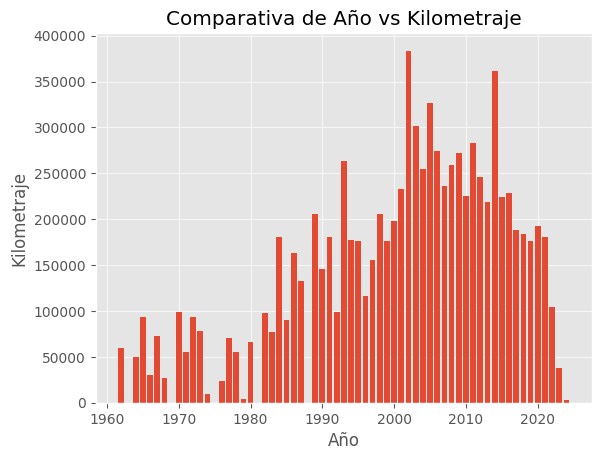

In [92]:
# Realizamos el primer grafico comparativo

mpl.style.use('ggplot')
fig, ax = plt.subplots()
ax.bar(df3.year, df3.mileage)
ax.set_title('Comparativa de Año vs Kilometraje')
ax.set_xlabel('Año')
ax.set_ylabel('Kilometraje')
plt.show()

<ipython-input-99-8fe6ce4958be>:7: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(mpl.cm.ScalarMappable(cmap='coolwarm'))


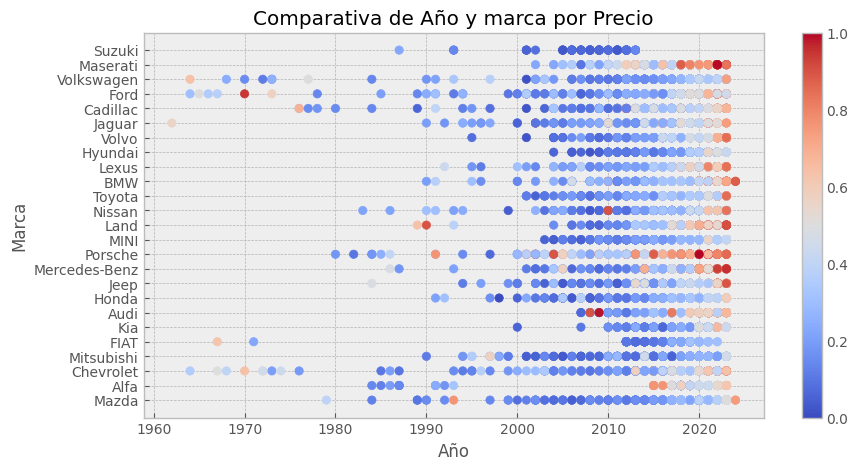

In [99]:
# Segundo cuadro comparativo "Año y Marca por Precio"

mpl.style.use('bmh')
fig, ax = plt.subplots(figsize=(10,5))
df3.loc[:, 'price'] = pd.to_numeric(df3['price'], errors='coerce')
ax.scatter(df3.year, df3.brand, c=df3.price, cmap='coolwarm')
fig.colorbar(mpl.cm.ScalarMappable(cmap='coolwarm'))
ax.title.set_text('Comparativa de Año y marca por Precio')
ax.set_xlabel('Año')
ax.set_ylabel('Marca')
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

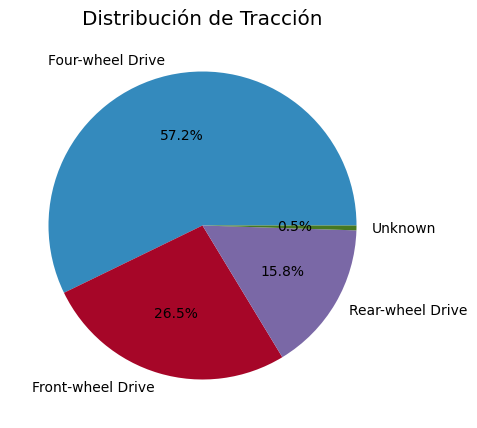

In [94]:
# Tercer grafico, distintos tipos de tracción
df = df[df.drivetrain != '2WD']
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(df.drivetrain.value_counts(), labels=df.drivetrain.value_counts().index, autopct='%1.1f%%')
ax.title.set_text('Distribución de Tracción')
plt

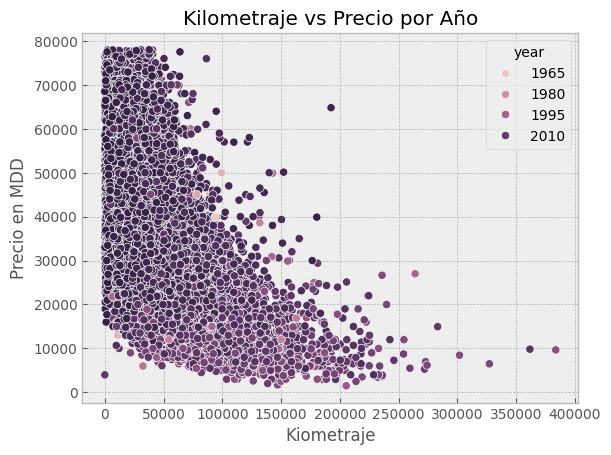

In [95]:
# Realicé un grafico mas que contenga 3 variables

sns.scatterplot(data=df3, x='mileage', y='price', hue='year')
plt.title('Kilometraje vs Precio por Año')
plt.xlabel('Kiometraje')
plt.ylabel('Precio en MDD')
plt.show()

Este grafico demuestra que a mayor kilometraje menor es el valor.

# *Estructurando un proyecto de DS*


Para reducir la dimencionalidad del Dataset utlilizamos la opcion de feature selection SelectKBest y filtrado de regresion lineal.

La eleccion del algorritmo es supervisado y de regresion lineal, ya que tengo un variable "Y" establecida y el resultado es cuantitativo.

In [96]:
# Elegir un método de feature selection para reducir la dimensionalidad del dataset

from sklearn.feature_selection import SelectKBest, f_regression

X = df3[['mileage', 'year']]
y = df3['price']

# Crear un selector de características para seleccionar las 2 mejores características
selector = SelectKBest(f_regression, k=2)

# Ajustar el selector a los datos
X_new = selector.fit_transform(X, y)

# Obtener las características seleccionadas
selected_features = X.columns[selector.get_support()]

print(selected_features)


Index(['mileage', 'year'], dtype='object')


In [97]:
# Hacer un algoritmo supervisado de regresion, varible objetvo 'price'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Convertir columnas relevantes a numéricas
df3.loc[:, 'year'] = pd.to_numeric(df3['year'], errors='coerce')
df3.loc[:, 'mileage'] = pd.to_numeric(df3['mileage'], errors='coerce')
df3.loc[:, 'price'] = pd.to_numeric(df3['price'], errors='coerce')

# Eliminar filas con valores faltantes después de la conversión
df3 = df3.dropna(subset=['year', 'mileage', 'price'])

# Seleccionar características y variable objetivo
X = df3[['year', 'mileage']]
y = df3['price']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R^2):', r2)

Error cuadrático medio (MSE): 148985245.83549634
Coeficiente de determinación (R^2): 0.3705523258923661


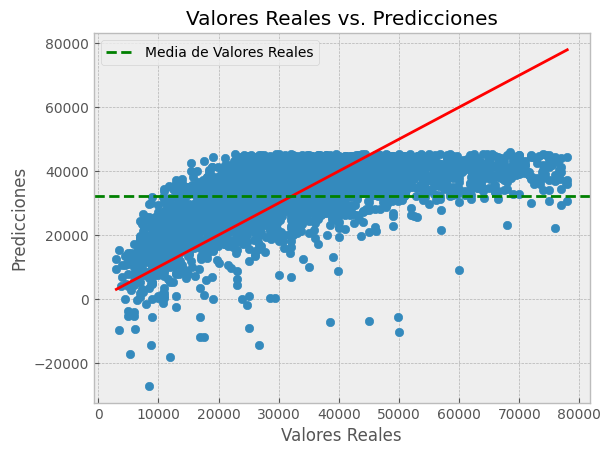

In [98]:
# Graficar los valores reales vs. las predicciones
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')

# Agregar una línea diagonal para referencia
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

media_y_test = y_test.mean()
plt.axhline(y=media_y_test, color='green', linestyle='--', label='Media de Valores Reales')

plt.legend()
plt.show()


# CONCLUSION

El algoritmo utilizado no es el correcto o le faltan parametros ya que una vez aplicado arroja resultados con valores negativos, siendo en este caso imposible para el estudio ya que se trata de valores de vehiculos usados, que probablemente disminuyan su valor o a lo sumo lo mantengan o si se trata de algun vehiculo clasico o de coleccion incluso lo incrementen, pero nunca sera negativo.

Ademas de verlo claramente en el grafico las evaluaciones realizadas (MSE y R^2) arrojan resultados contundentes.